# Practical Lab 3 - Univariate Linear Regression

### Univariate Linear Regression on the California Housing Prices Dataset  

In this lab you will train your first machine learning model in our course - a univariate linear regression model. You are asked to run a linear regression between the median house value (dependent variable) and each of the following independent variables. You should run three models, one for each independent variable: 

- median income
- population
- number of households



##### Tasks

1. Framing the Problem - Describe the goal of this report.

    The main goal of this report is to to provide insights into the relationships between median house value and three independent variables: median income, population, and number of households.

In [74]:
# import the needed packages
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

2. Getting the Data - hyperlinking to the source and loading into Pandas.   
        Source: [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

In [75]:
# Load the dataset
housing_data = pd.read_csv("data/housing.csv")

# Print the first 5 rows
housing_data.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


3. Exploratory Data Analysis (EDA):  

- Explore statistics (e.g. using Pandas 'describe' function). Describe the 4 variables used in this lab. Review the range of the data for each variable, and other issues you notice

In [76]:
# Fetching the summary of the dataset
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*This function returns the summary of the dataset including the mean,count and std*

- Describe the 4 variables used in this lab. Review the range of the data for each variable, and other issues you notice 


In [77]:
# Extracting range for each variable
variable_range = housing_data[['median_house_value', 'median_income', 'population','households']].agg(['min', 'max'])

# Check for missing values
missing_values = housing_data[['median_house_value', 'median_income', 'population','households']].isnull().sum()

print("\nVariable Range:")
print(variable_range)

print("\nMissing Values:")
print(missing_values)


Variable Range:
     median_house_value  median_income  population  households
min             14999.0         0.4999         3.0         1.0
max            500001.0        15.0001     35682.0      6082.0

Missing Values:
median_house_value    0
median_income         0
population            0
households            0
dtype: int64


*For the above we have used the 'agg' function which returns the aggregate (min/max) to get the range of the dataset. Also, '.isnull().sum()' this will return the number of zeros present in the for each variable*

- Create three Seaborn scatter plots of median house value vs. median income, population and number of households. There should be one scatter plot per each independent variable. Add a title to each graph (using Seaborn). Provide textual review of what you see in these graphs (relevant insights).

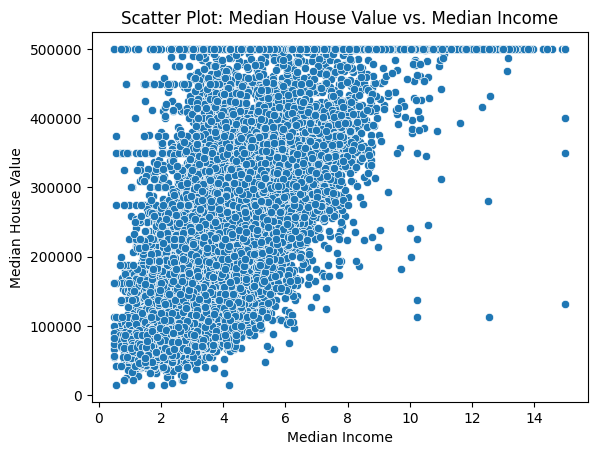

In [78]:

# Scatter plot: median house value vs. median income
scatter_plot1 = sns.scatterplot(x='median_income', y='median_house_value', data=housing_data)
scatter_plot1.set_title('Scatter Plot: Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


*In Scatter Plot: Median House Value vs. Median Income, we see that there is high concentration when the both values are low and as the both the values increase the data points also becomes less. This shows that the regions with lower median incomes, house values also tend to be lower and vice versa.*

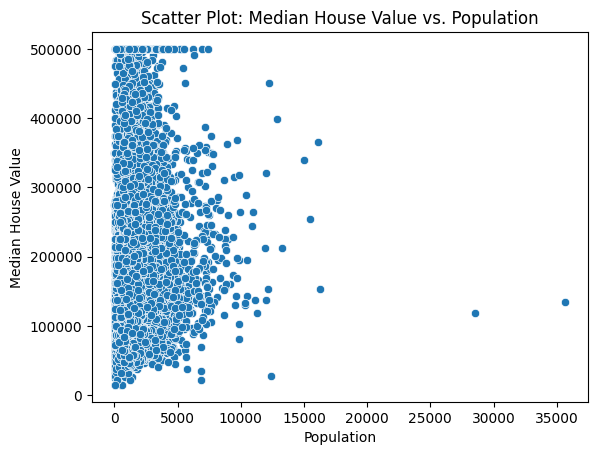

In [79]:
# Scatter plot: median house value vs. population
scatter_plot2 = sns.scatterplot(x='population', y='median_house_value', data=housing_data)
scatter_plot2.set_title('Scatter Plot: Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

*In Scatter Plot: Median House Value vs. Population, suggest that there might be a complex relationship between population size and median house value. In regions with smaller populations, house values tend to be higher. However, as population size increases, the relationship becomes less clear, with a wide range of house values observed.*

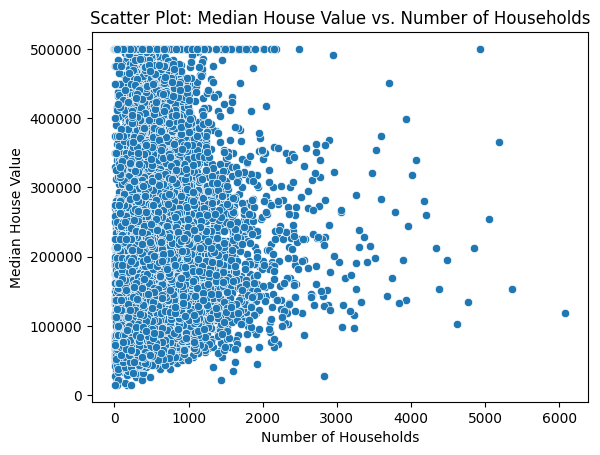

In [80]:

# Scatter plot: median house value vs. number of households
scatter_plot3 = sns.scatterplot(x='households', y='median_house_value', data=housing_data)
scatter_plot3.set_title('Scatter Plot: Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

*In Scatter Plot: Median House Value vs. Number of Households, suggest that while there are many areas with a low number of households and low median house values, an increase in the number of households does not necessarily have a relation with an increase or decrease in median house value.*

In [81]:
# Define a Model
model = linear_model.LinearRegression()

4. Run three linear regressions (fitting) between:
    - median house value vs. median income
    - median house value vs. population
    - median house value vs. number of households

5. Summarize in a table, for each of the three models:
    - intercept and slope
    - Mean Squared Error - the loss 
    - Mean Absolute Error 
6. Plot the resulting line on top of the scatter data for each of the three models (three separate graphs)
7. Provide a conclusion about the goodness-of-fit, and other insights you might

>**median house value vs. median income**







In [82]:
# fitting median house value vs. median income
model.fit(housing_data[['median_income']], housing_data['median_house_value'])


LinearRegression()

In [83]:
# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(housing_data[['median_house_value']], model.predict(housing_data[['median_income']]))
mae = mean_absolute_error(housing_data[['median_house_value']], model.predict(housing_data[['median_income']]))

# Create a DataFrame for results
results_housing_m1 = pd.DataFrame({
    'Metric': ['Intercept', 'Coefficient', 'Mean Squared Error', 'Mean Absolute Error'],
    'Value': [intercept, coefficients, mse, mae]})

print(results_housing_m1)

                Metric                 Value
0            Intercept          45085.576703
1          Coefficient  [41793.849201896286]
2   Mean Squared Error     7011311502.929527
3  Mean Absolute Error          62625.933791


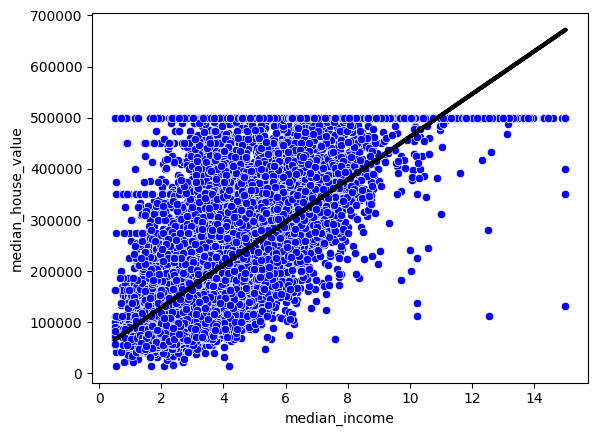

In [84]:
# plot the regression line
sns.scatterplot(x="median_income", y="median_house_value", data=housing_data, color="blue")
plt.plot(housing_data[["median_income"]], model.predict(housing_data[["median_income"]]), color="black", linewidth=3)
plt.show()

>**median house value vs. population**

In [85]:
# fitting median house value vs. median income
model.fit(housing_data[['population']], housing_data['median_house_value'])

LinearRegression()

In [86]:
# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(housing_data[['median_house_value']], model.predict(housing_data[['population']]))
mae = mean_absolute_error(housing_data[['median_house_value']], model.predict(housing_data[['population']]))

# Create a DataFrame for results
results_housing_m2 = pd.DataFrame({
    'Metric': ['Intercept', 'Coefficient', 'Mean Squared Error', 'Mean Absolute Error'],
    'Value': [intercept, coefficients, mse, mae]})

print(results_housing_m2)




                Metric                 Value
0            Intercept         210436.262076
1          Coefficient  [-2.511752774615085]
2   Mean Squared Error    13307412412.389355
3  Mean Absolute Error          91153.820095


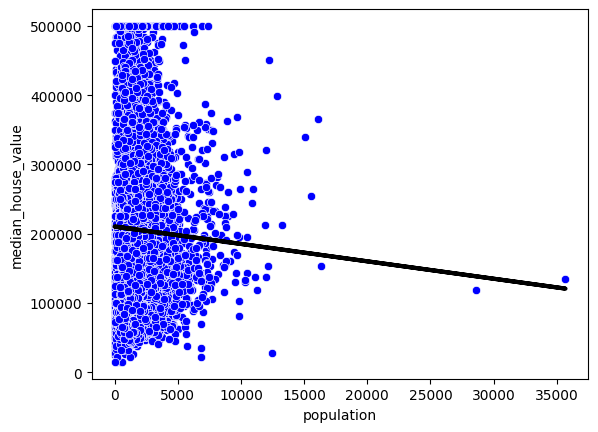

In [87]:
# plot the regression line
sns.scatterplot(x="population", y="median_house_value", data=housing_data, color="blue")
plt.plot(housing_data[["population"]], model.predict(housing_data[["population"]]), color="black", linewidth=3)
plt.show()

>**median house value vs. number of households**

In [88]:
# fitting median house value vs. median income
model.fit(housing_data[['households']], housing_data['median_house_value'])

LinearRegression()

In [89]:
# Get model parameters
intercept = model.intercept_
coefficients = model.coef_

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(housing_data[['median_house_value']], model.predict(housing_data[['households']]))
mae = mean_absolute_error(housing_data[['median_house_value']], model.predict(housing_data[['households']]))

# Create a DataFrame for result
results_housing_m3 = pd.DataFrame({
    'Metric': ['Intercept', 'Coefficient', 'Mean Squared Error', 'Mean Absolute Error'],
    'Value': [intercept, coefficients, mse, mae]})

print(results_housing_m3)

                Metric                 Value
0            Intercept         196928.577162
1          Coefficient  [19.872775155643875]
2   Mean Squared Error    13257776904.728533
3  Mean Absolute Error          90802.743243


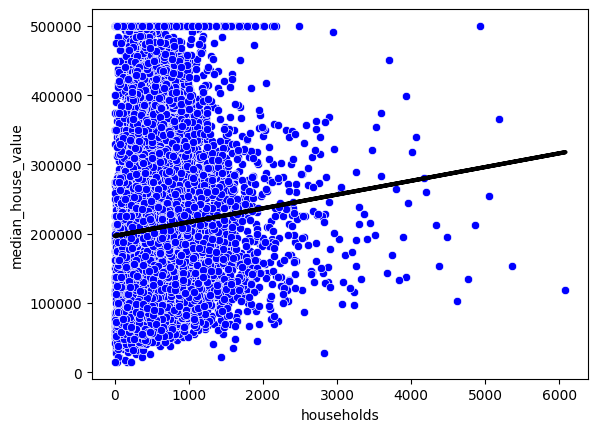

In [90]:
# plot the regression line
sns.scatterplot(x="households", y="median_house_value", data=housing_data, color="blue")
plt.plot(housing_data[["households"]], model.predict(housing_data[["households"]]), color="black", linewidth=3)
plt.show()

*From the all three models above we see that, the first model with "median_income" is the better model as it has the lowest MSE and MAE. A lower MSE and MAE suggests that is a better fit of the model. However, the choice of the model can depend on the purpose of the model.* 